# 데이터 불러오기!!!

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [23]:
import warnings
warnings.filterwarnings('ignore')

* Counter 기능 설명

In [2]:
t = ["aa","bb","cc","dd","aa","aa","aa","bb"]

In [5]:
Counter(t)

Counter({'aa': 4, 'bb': 2, 'cc': 1, 'dd': 1})

In [6]:
Counter(t)["bb"]

2

* 데이터 불러오기..median_house_hold_in_come, percentage_people_below_poverty_level,percent_over_25_completed_highSchool,  share_race_city, kill


In [5]:
median_house_hold_in_come = pd.read_csv('MedianHouseholdIncome2015.csv',encoding="windows-1252")

percentage_people_below_poverty_level = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")

percent_over_25_completed_highSchool = pd.read_csv('PercentOver25CompletedHighSchool.csv', encoding="windows-1252")

share_race_city = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")

kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

* percentage_people_below_poverty_level 에 대한 기본 정보 확인, Geographic Area 별로의 유니크한 값 확인!!!!

In [4]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [5]:
percentage_people_below_poverty_level["poverty_rate"][0]

'78.8'

In [6]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [7]:
percentage_people_below_poverty_level['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

Text(0.5,1,'Poverty Rate Given States')

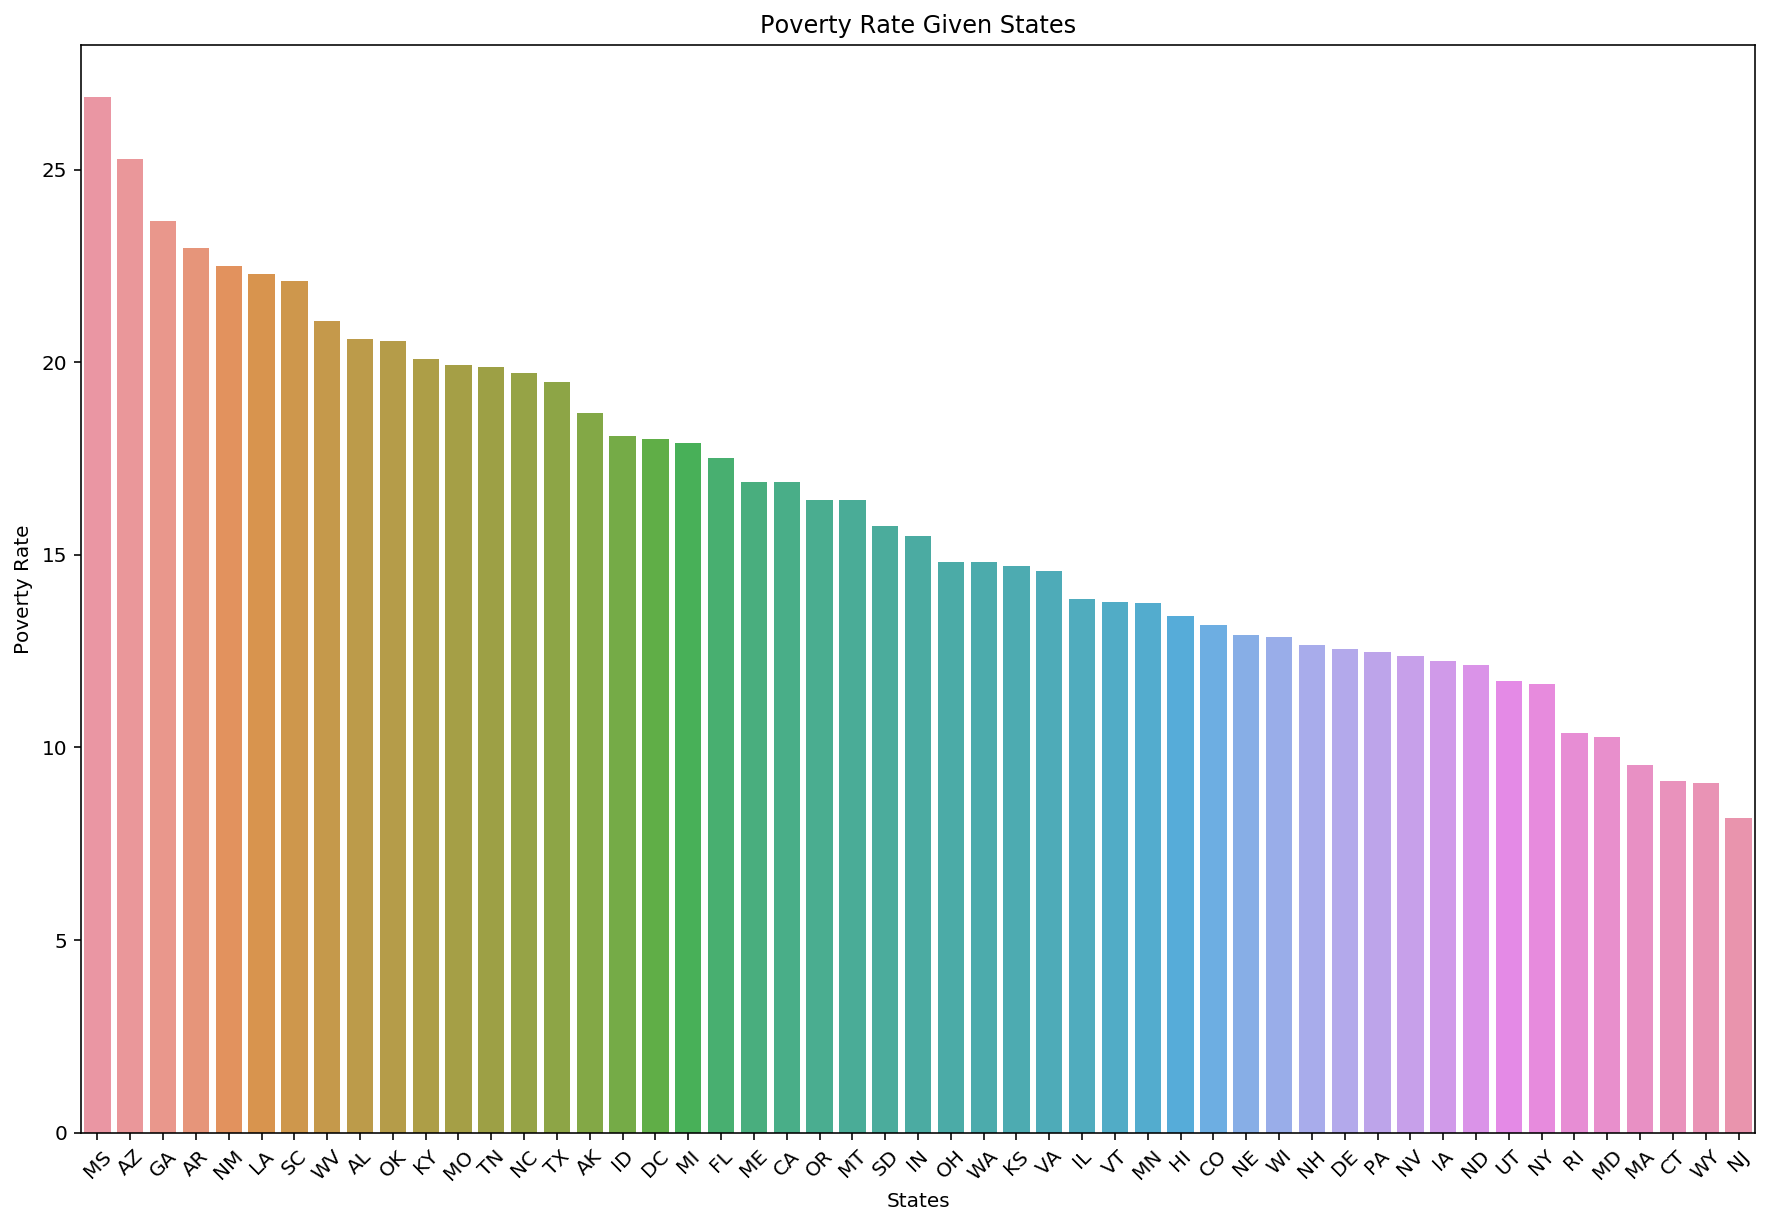

In [8]:
# poverty_rate 에 대한 숫자 조정 및 타입 조정
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)

# 지역에 대한 리스트 생성
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())

# 지역별로 poverty_rate의 값을 계산
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)

# data 라는 데이터 프레임 만들기...: area_list / area_poverty_ratio
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})

new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values

sorted_data = data.reindex(new_index)


# 시각화
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

* kill 데이터 확인!

In [8]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


* kill 중에서 name 별로 수 확인

In [9]:
kill["name"].value_counts()

TK TK                       49
Eric Harris                  2
TK Tk                        2
Brandon Jones                2
Michael Johnson              2
Daquan Antonio Westbrook     2
Michael Brown                2
Angel Ramos                  1
Lawrence Caldwell            1
Daniel Craven                1
Megan Hockaday               1
Robert Kohl                  1
William Tracy Patterson      1
Jessie J. Mills              1
John Harley Turner           1
Troy Boyle                   1
Karen Janks                  1
Bodhi Wilson Dean Phelps     1
Aaron M. Thompson            1
Ebin Lamont Proctor          1
Landon Nobles                1
Joshua Douglas               1
Efren Eloy Trujillo          1
Richard Bard Jr.             1
Andrew Byrd                  1
Herbert Ballance             1
Dracy "Clint" Pendleton      1
Christine A. Lucas           1
James Ellis                  1
Carl Nivens                  1
                            ..
Mark Daniel Bess             1
Trevon J

* 이름 별로 그래프 시각화..

* cf) 그에 앞서서 zip에 대한 이해 : 갯수가 안 맞으면 아래와 같이 제일 작은 것을 기준으로 함....--> 이 예제에서도 제일 앞에 이름, 2번째 이름만 분석으로 사용을 하고, 그 뒤에 이름이 3~4개까지 있는 사람의 경우에는 분석에서는 제외를 함..

In [10]:
name = ["a","b"]
value = [1,2,3]
for n, v in zip(name, value):
    print(n,v)

a 1
b 2


Text(0.5,1,'Most common 15 Name or Surname of killed people')

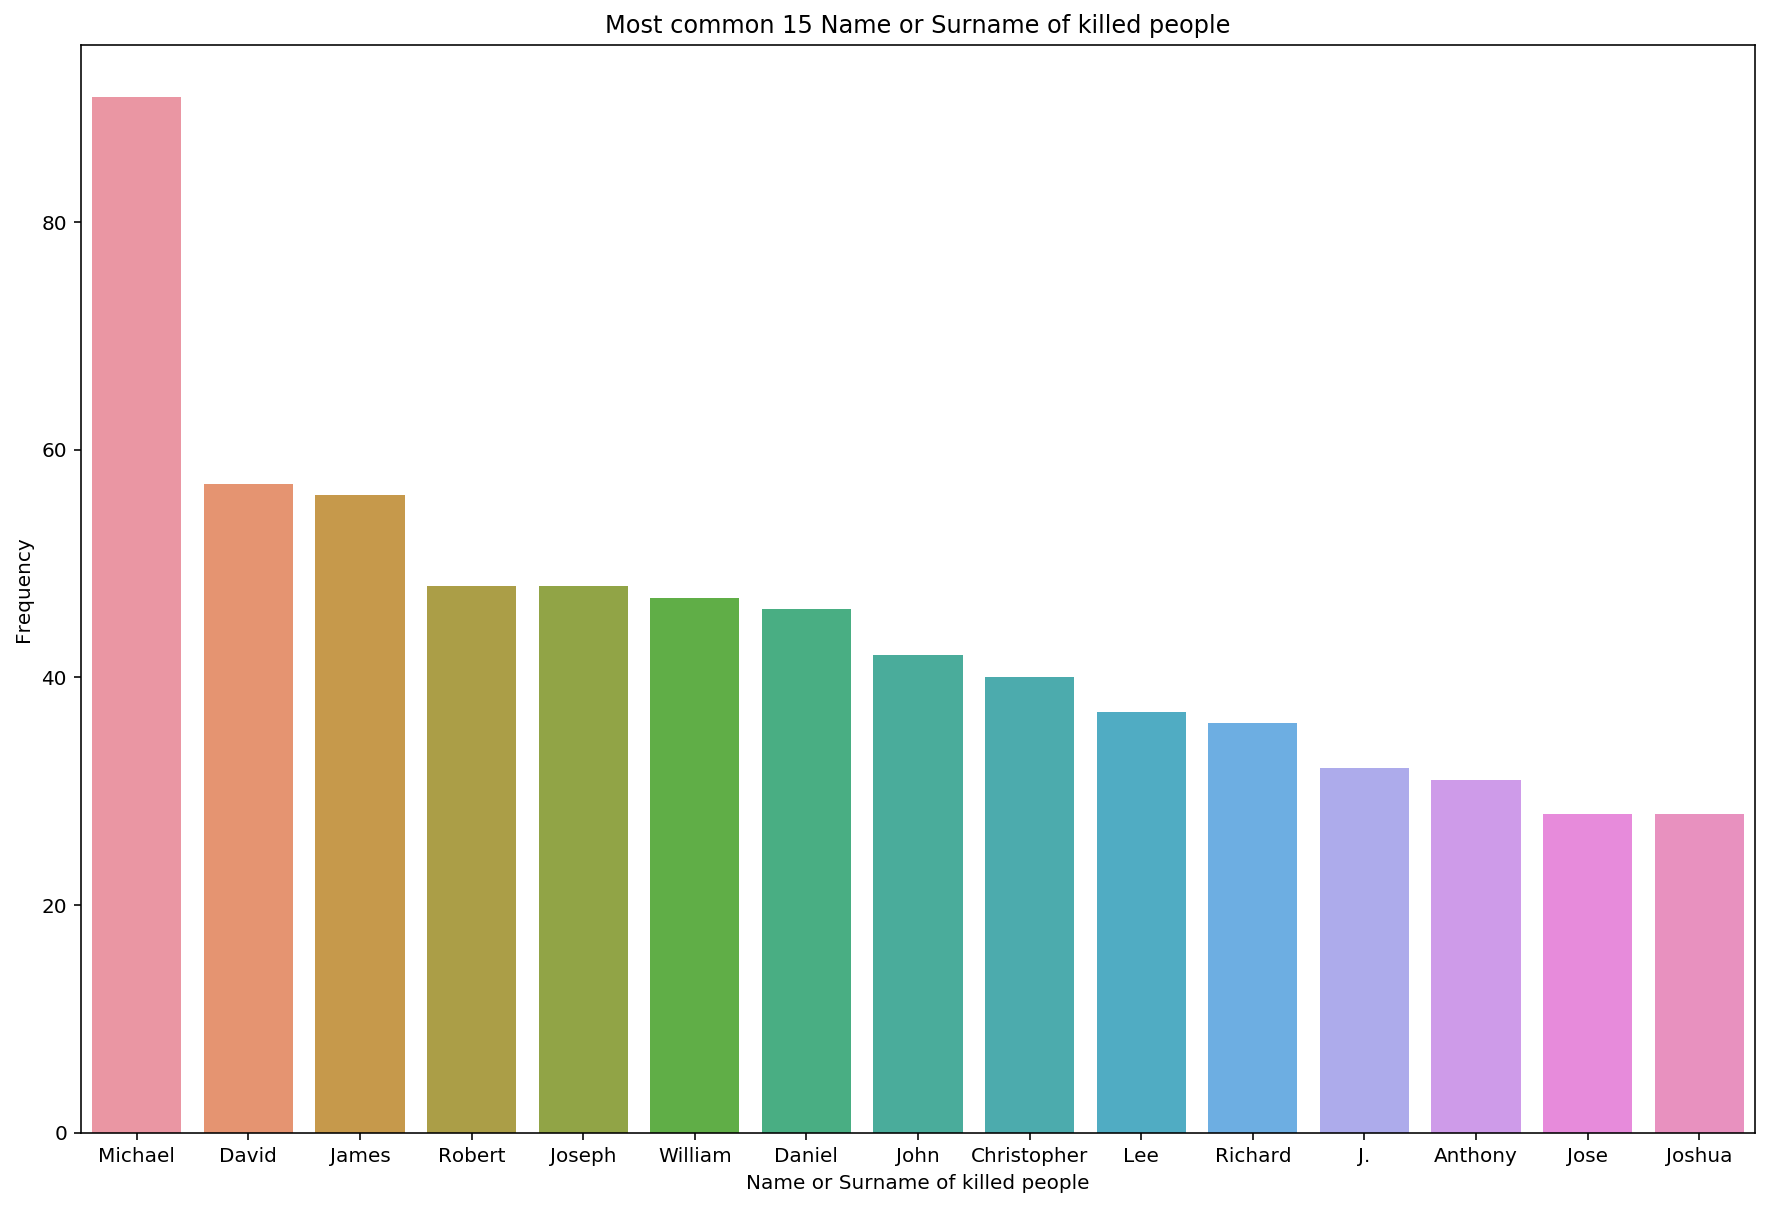

In [11]:
# 참고 : 아래의 경우에 있어서 한 단계씩 돌려보면서 그 값을 확인하면서 진행을 해야 처음 접하는 사람 이해하기 쉬움...

# 이름을 띄어 쓰기를 기준으로 분리.
separate = kill.name[kill.name != 'TK TK'].str.split()
# 1번 이름과, 2번 이름을 기준으로 ,a,b로 처리를 함. 이유는 3~4번째는 zip 하면서 제외가 되고, 그 뒤에 이름에는 가문, 몇 세 등이 있어서 우선은 간략히 하기 위해서 제외;;;
# a 콤마 b
a,b = zip(*separate)
# 이름에 대한 리스트들을 합쳐서...
name_list = a+b
# Collection의 Counter의 경우에는 동일한 값이 얼마나 있는지 확인.
name_count = Counter(name_list)
# 상위 15개만 추리는 부분..
most_common_names = name_count.most_common(15)

# name_list 콤마 count_list
name_list,count_list = zip(*most_common_names)
name_list,count_list = list(name_list),list(count_list)

# 그리기...
plt.figure(figsize=(15,10))
ax = sns.barplot(x=name_list, y=count_list)
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')

* percent_over_25_completed_highSchool에 대한 기본 정보 확인

In [10]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [11]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area         29329 non-null object
City                    29329 non-null object
percent_completed_hs    29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


* percent_over_25_completed_highSchool의 percent_complteed_hs 의 값 확인

In [12]:
percent_over_25_completed_highSchool["percent_completed_hs"].value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
91.3     163
89.3     162
93.8     161
93.2     160
92.1     159
92.7     158
91.9     158
92.2     157
90.9     156
93.4     156
89.7     153
91.1     150
89.4     150
93.9     150
90.2     149
91.6     148
91.5     147
88.1     146
92.6     146
93.6     146
89.1     145
90.4     145
94.3     144
92.4     142
89.9     142
        ... 
43.8       1
27.8       1
40.1       1
36.5       1
30.6       1
28.5       1
20         1
20.1       1
42.8       1
36.4       1
44.9       1
13.3       1
8.1        1
31.8       1
28.3       1
29.1       1
15.5       1
35.6       1
39.7       1
33         1
29.2       1
27.5       1
38.2       1
32.4       1
12.9       1
43         1
22.6       1
22.9       1
41         1
38.6       1
Name: percent_completed_hs, Length: 728, dtype: int64

* percent_over_25_completed_highSchool에 대해서 percent_complted_hs에서 지역별로 위에서와 같이 처리하고, 그래프로...

In [25]:
# 문자라고 숫자로 변경이 안 되는 것이 있으면 에러가 발생을 함...그래서 우선 아래의 경우에 대한 이상치를 처리를 함....
np.array(["1","2","-"]).astype(float)

ValueError: could not convert string to float: '-'

In [8]:
# replace를 활용해서 "-" 같은 이상한 문자들을 처리를 함.
np.array(["1","2",0.0]).astype(float)

array([1., 2., 0.])

Text(0.5,1,"Percentage of Given State's Population Above 25 that Has Graduated High School")

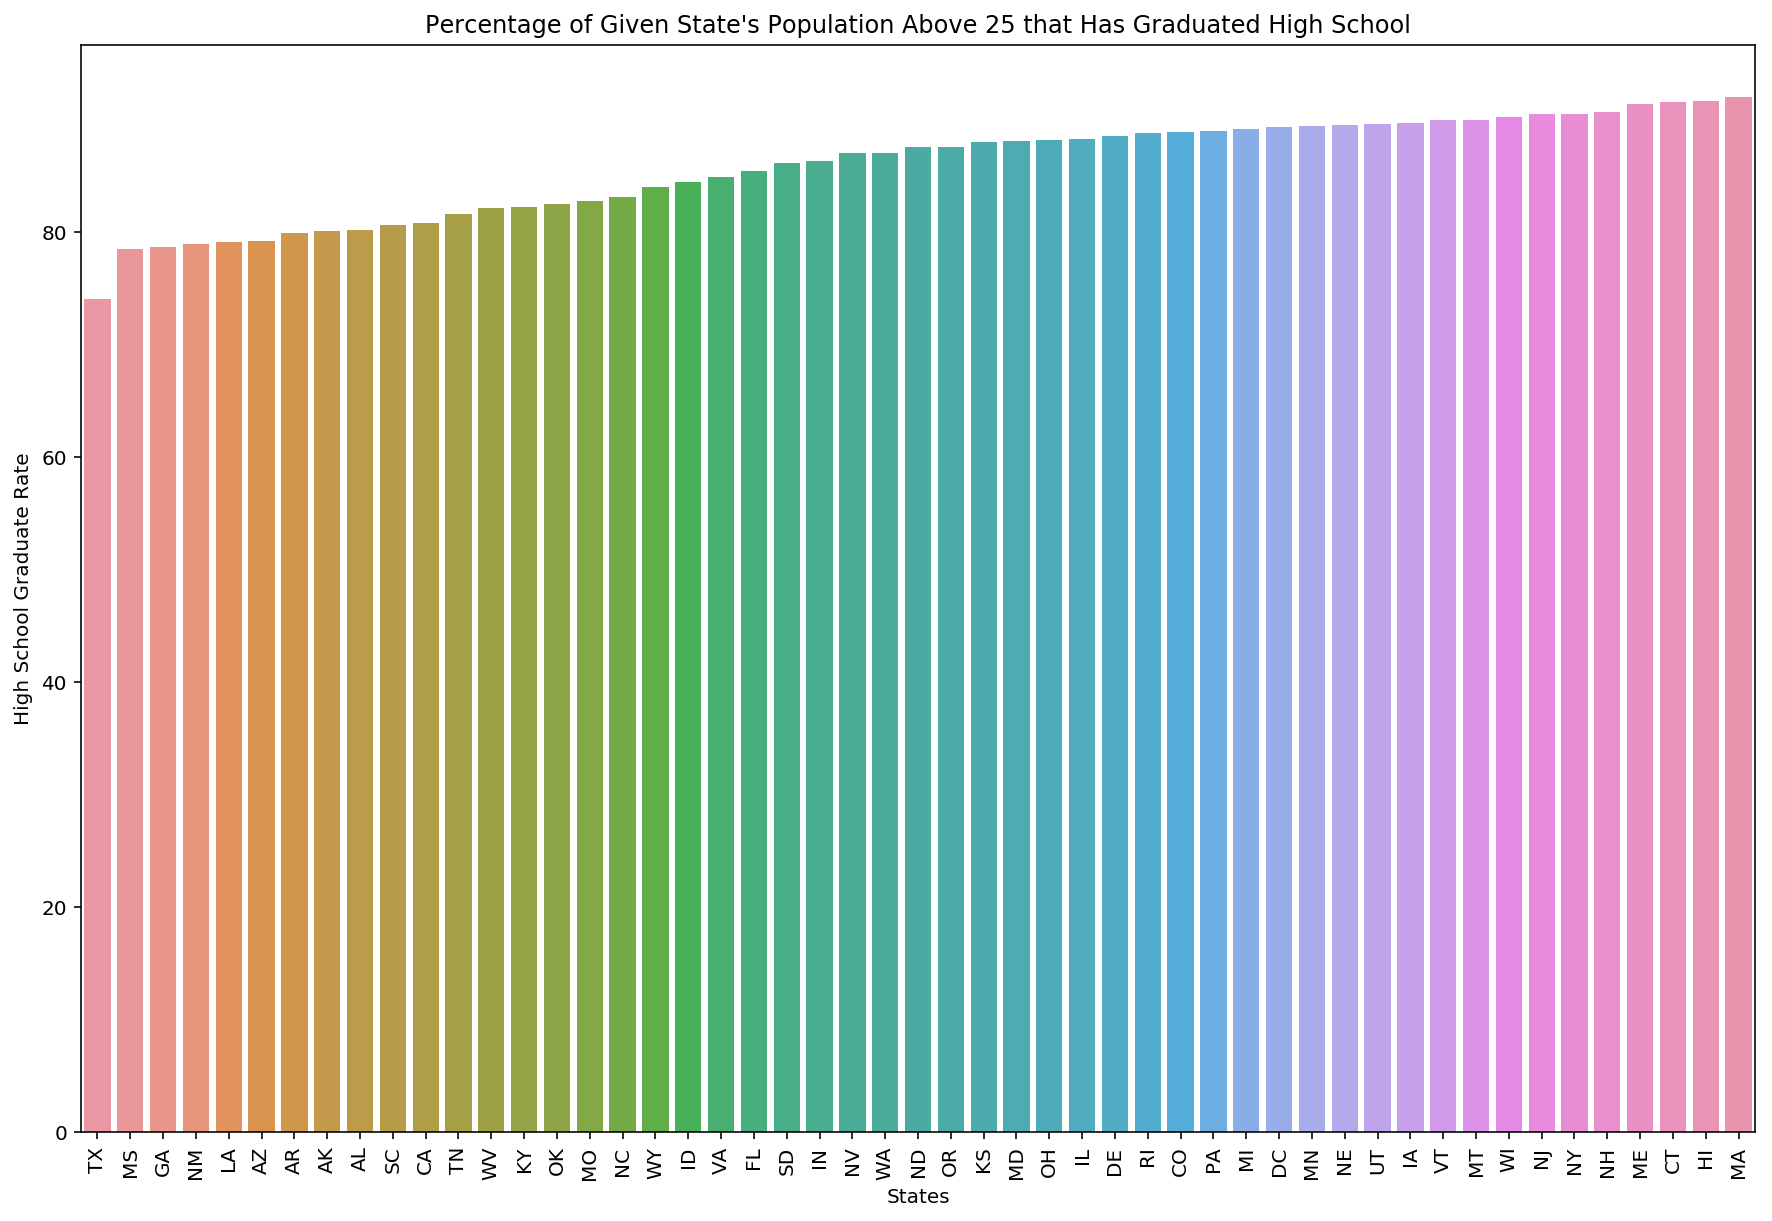

In [13]:
# 고들 졸업 비율 25개 주별로...처리하자...
# 아래의 경우에는 이상치 데이터를 전체에서 찾아서 변경을 하고
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)
# 전체에서 이제는 문자이지만 수로 변경이 가능한 것들로 되어 있어서 일괄 처리...
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)


area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    # x에는 주코드가 i인 전체 데이터를 수집: 수집결과는 DataFrame
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    # i번째 주의 졸업비율의 평균
    area_highschool_rate = sum(x["percent_completed_hs"])/len(x)
    # area_highschool에 계산한 평균값을 모아두기...
    area_highschool.append(area_highschool_rate)

# 정리..
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})

new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)


# 시각화...
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")

* share_race 관련 정보 확인

In [20]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [21]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


In [22]:
share_race_city["share_asian"].value_counts()

0       8537
0.2     1879
0.3     1775
0.4     1644
0.1     1426
0.5     1411
0.6     1204
0.7     1004
0.8      919
0.9      708
1        637
1.1      553
1.2      468
1.3      426
1.4      393
1.5      338
1.6      313
1.7      302
1.8      284
1.9      248
2        199
2.1      184
2.2      172
2.4      169
2.3      165
2.5      141
2.6      132
2.8      114
3        108
2.7      106
        ... 
38.5       1
32.6       1
59.2       1
27.8       1
49.9       1
19.2       1
28.6       1
46         1
57         1
39.2       1
52         1
23.6       1
21.8       1
23.7       1
64.4       1
28.9       1
18.4       1
18.5       1
45         1
54.6       1
29         1
29.4       1
43.4       1
40.5       1
55.7       1
49.4       1
36.5       1
49.1       1
34         1
59.8       1
Name: share_asian, Length: 409, dtype: int64

In [7]:
# 아래의 경우를 해야지만 이상한 값이 (X) 가 있어서 뒤에서 처리해야하는지 이해를 함...
share_race_city.share_asian.unique()

array(['0', '1', '0.3', '0.1', '0.9', '0.5', '0.6', '0.2', '0.8', '0.7',
       '5.3', '1.5', '22.8', '2.3', '0.4', '4.4', '2', '1.2', '1.6',
       '2.7', '1.1', '1.4', '1.3', '1.8', '2.2', '5.1', '2.4', '1.9',
       '2.8', '5.5', '7', '2.1', '1.7', '2.6', '3.4', '3.8', '52.5',
       '43.3', '8.1', '9.1', '2.5', '3.3', '(X)', '4.6', '10.9', '4.1',
       '3.6', '2.9', '6.1', '10.8', '36.5', '37.4', '7.4', '4', '3.2',
       '34.7', '6', '5.6', '32.6', '7.7', '3.5', '5.2', '8.2', '4.5',
       '5.8', '3.9', '4.3', '9', '3.1', '10', '5.7', '6.5', '4.7', '11.1',
       '8.3', '3', '4.2', '7.6', '7.9', '7.5', '31.2', '52.9', '14.6',
       '16.2', '5.4', '13.1', '32.9', '14.8', '13.3', '10.5', '59.2',
       '37.1', '18.4', '13.2', '5', '8.8', '8.7', '6.2', '14.2', '9.9',
       '21', '4.8', '11.6', '19.9', '19.3', '8.9', '19.5', '9.6', '6.8',
       '26.3', '18.2', '25.3', '40.1', '26.7', '20.3', '8.6', '10.2',
       '6.7', '50.8', '16.1', '7.1', '25.6', '4.9', '11.4', '8.5', '21.4',


In [19]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


* 정보를 share 정류에 따라서 정리...

[Text(0,0.5,'States'),
 Text(0.5,0,'Percentage of Races'),
 Text(0.5,1,"Percentage of State's Population According to Races ")]

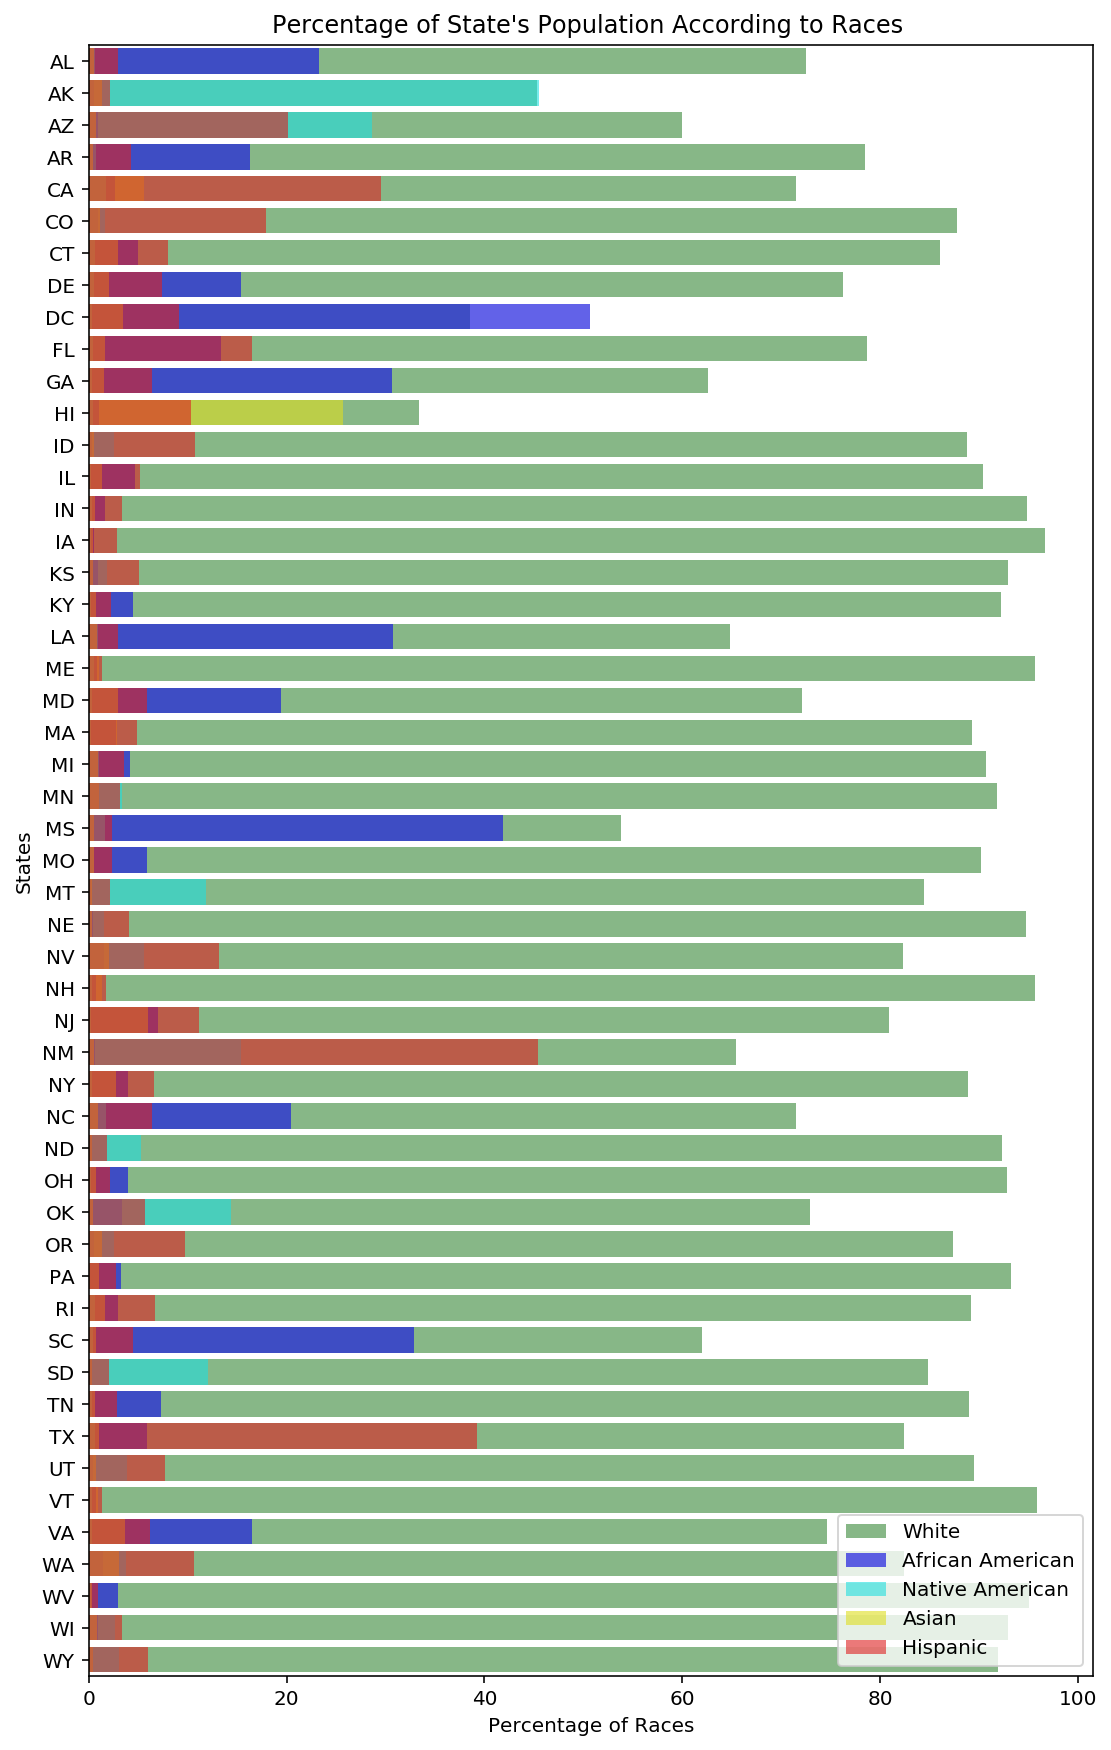

In [13]:
## 주별 인구의 비율에 따라서, 'share_white','share_black','share_native_american','share_asian','share_hispanic' 인종별로..
share_race_city.replace(['-'],0.0,inplace = True)
share_race_city.replace(['(X)'],0.0,inplace = True)
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
# 다시 지역별로..
area_list = list(share_race_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))
    
# 시각화
fig,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' )
sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')

sns.barplot(x=share_hispanic,y=area_list,color='red',alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)

ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")

*가로 : 주별로, 세로 : high school graduation rate vs Poverty rate of each state(단위 : 비율 0~1사이의 비율로...)에 대한 그래프 그리기...

In [14]:
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])


sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio'])


In [15]:
sorted_data.head()

,area_list,area_poverty_ratio
24,MS,1.000000
2,AZ,0.939884
10,GA,0.880204
3,AR,0.854151
31,NM,0.837207


In [16]:
sorted_data2.head()

,area_list,area_highschool_ratio
43,TX,0.805044
24,MS,0.852679
10,GA,0.854458
31,NM,0.858124
18,LA,0.859760


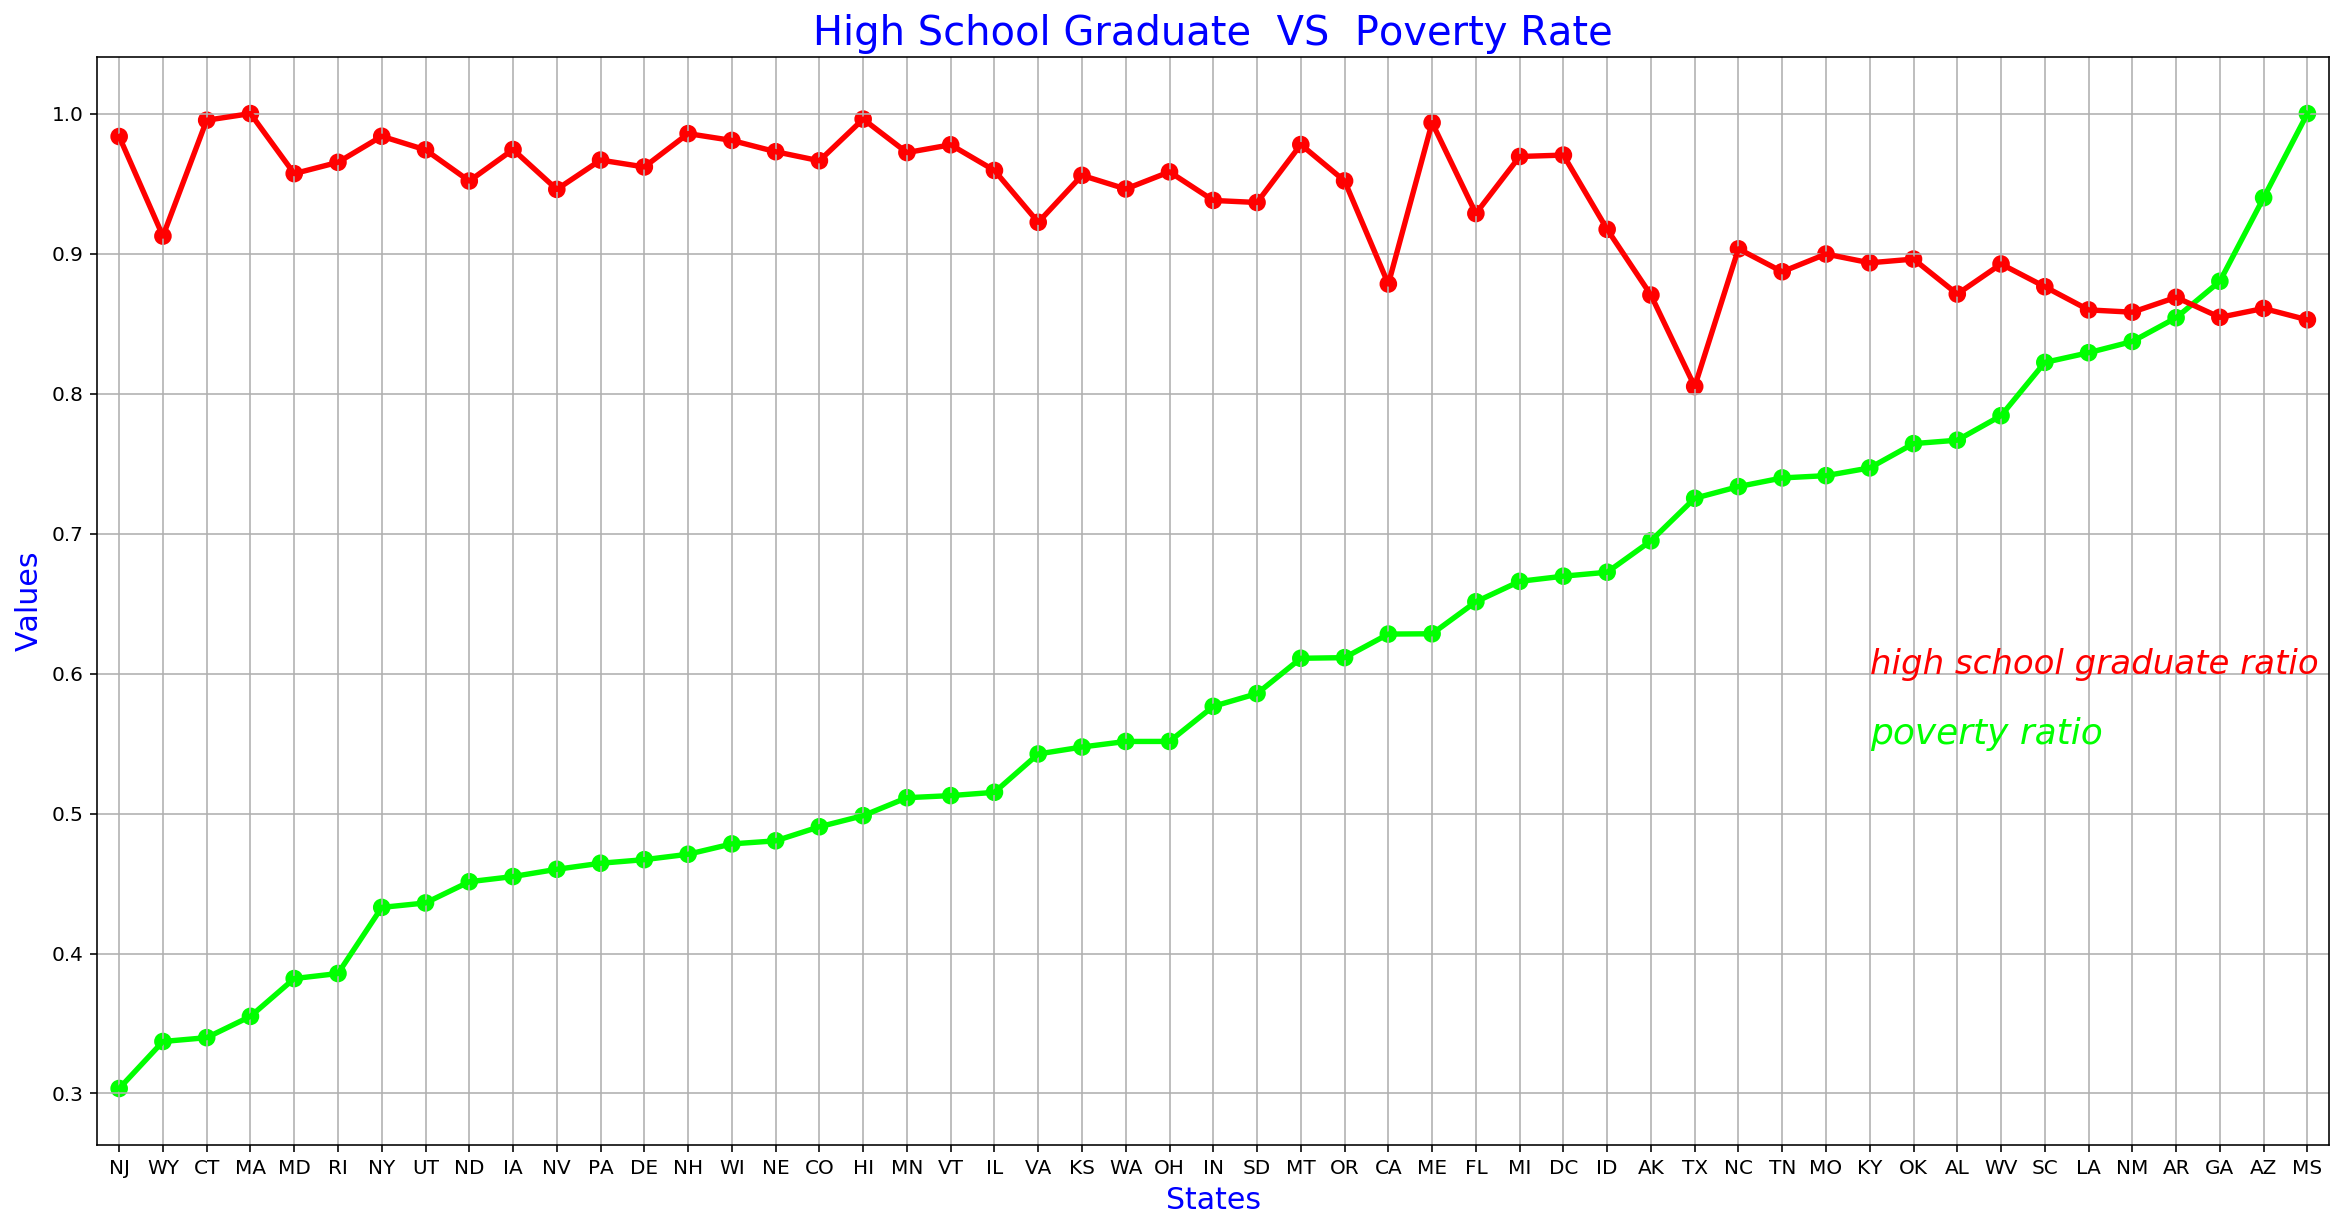

In [18]:
# 2가지 정보들에 대한 정리를 하면서 백퍼센트로 정리..(빈곤율 제일 큰 값기준으로 상대적으로 계산..)
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])

sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio'])



data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
data.sort_values(by='area_poverty_ratio',inplace=True)


# 시각화..
#fig 콤마 ax1
fig,ax1 = plt.subplots(figsize =(20,10))
# 아래는 다 점.--> 2개 그래프 그리는 부분
sns.pointplot(x='area_list',y='area_poverty_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x='area_list',y='area_highschool_ratio',data=data,color='red',alpha=0.8)
# 꾸미기....
plt.text(40,0.6,'high school graduate ratio',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'poverty ratio',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue')
plt.grid()

* data에 대해서..

In [22]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


* data.area_poverty_ratio와 data.area_highschool_ratio 사이의 jointplot를 보고 싶음

/ext/anaconda5/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


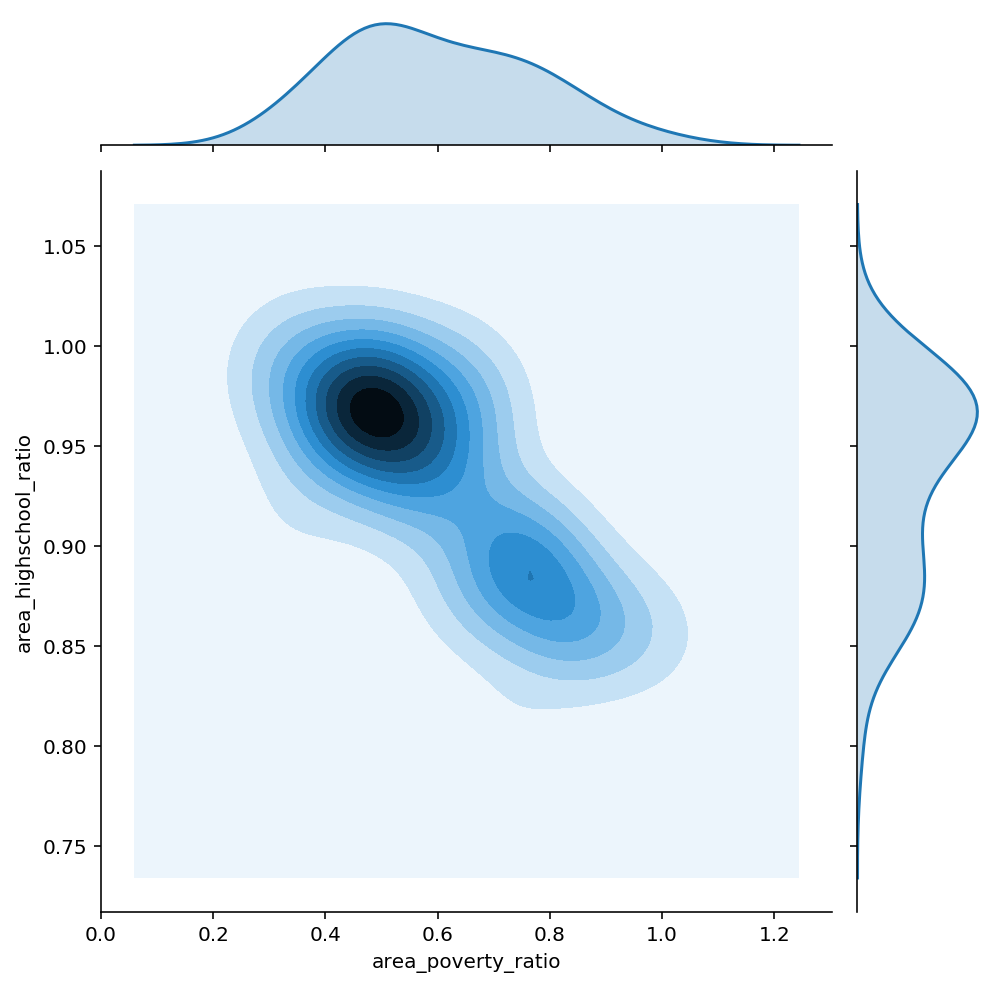

In [19]:
# 상관 관계에 대한 것을 보고 싶음..
g = sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind="kde", height=7)
plt.savefig('graph.png')
plt.show()

In [24]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


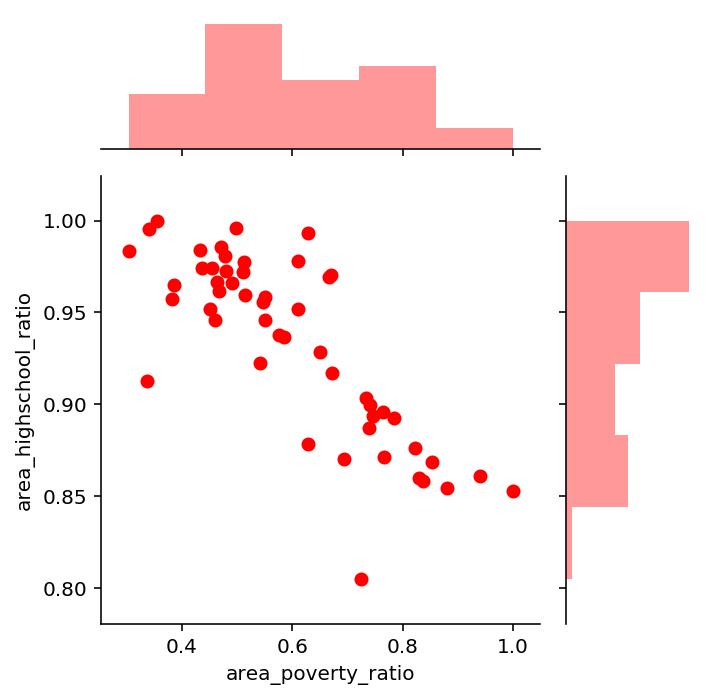

In [22]:
# you can change parameters of joint plot
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
# Different usage of parameters but same plot with previous one
g = sns.jointplot("area_poverty_ratio", "area_highschool_ratio", data=data,height=5, ratio=3, color="r")

In [3]:
kill.race.head(15)

0     A
1     W
2     H
3     W
4     H
5     W
6     H
7     W
8     W
9     B
10    W
11    B
12    B
13    W
14    B
Name: race, dtype: object

In [27]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [6]:
kill["race"].value_counts().index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

Text(0.5,1,'Killed People According to Races')

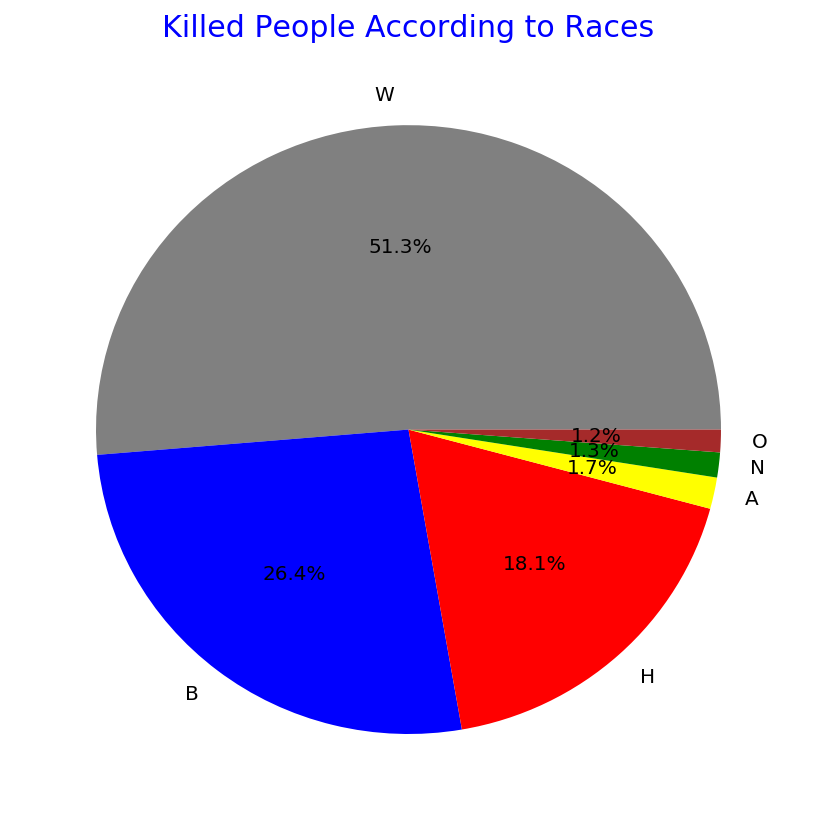

In [10]:
# Race rates according in kill data 
# 이상한 데이터 날리기..
kill["race"].dropna(inplace = True)
# 인종별로 분여된 값을 라벨로 사용. --> 6종류..
labels = kill["race"].value_counts().index
# 위의 6인종 분류에 대해서 색상 부여할 리스트..
colors = ['grey','blue','red','yellow','green','brown']
# 6인종 분류에 대한 실제 값으로 사이즈 설정...
sizes = kill["race"].value_counts().values

# visual(다 점으로...)
plt.figure(figsize = (7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Races',color = 'blue',fontsize = 15)
#################

In [29]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


/ext/anaconda5/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


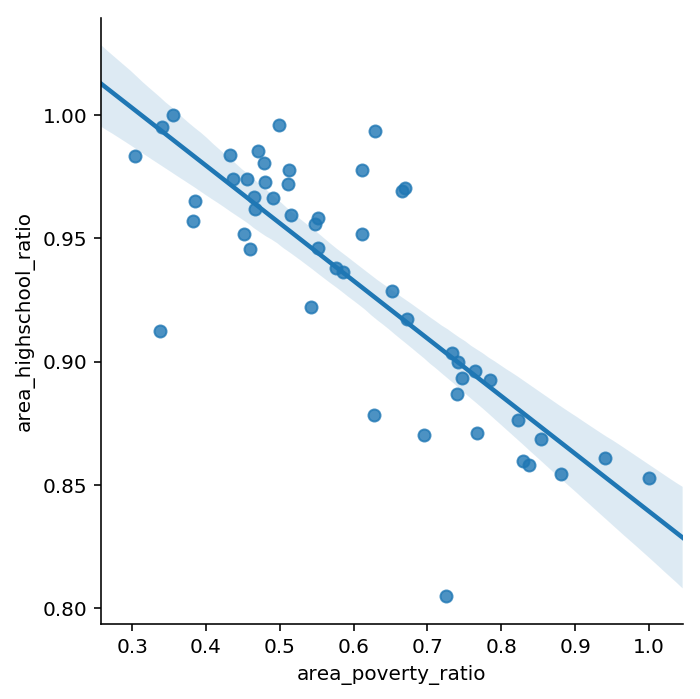

In [30]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# lmplot 
# Show the results of a linear regression within each dataset
sns.lmplot(x="area_poverty_ratio", y="area_highschool_ratio", data=data)
plt.show()

In [31]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


/ext/anaconda5/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


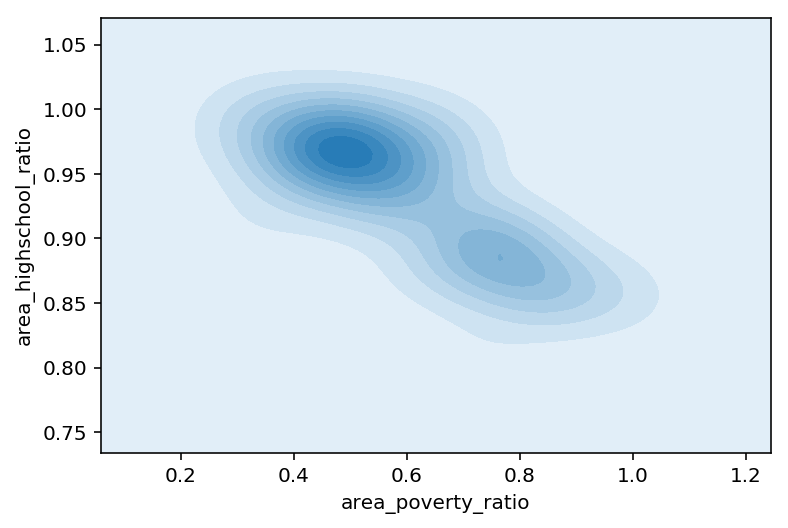

In [32]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# cubehelix plot
sns.kdeplot(data.area_poverty_ratio, data.area_highschool_ratio, shade=True, cut=3)
plt.show()

In [33]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


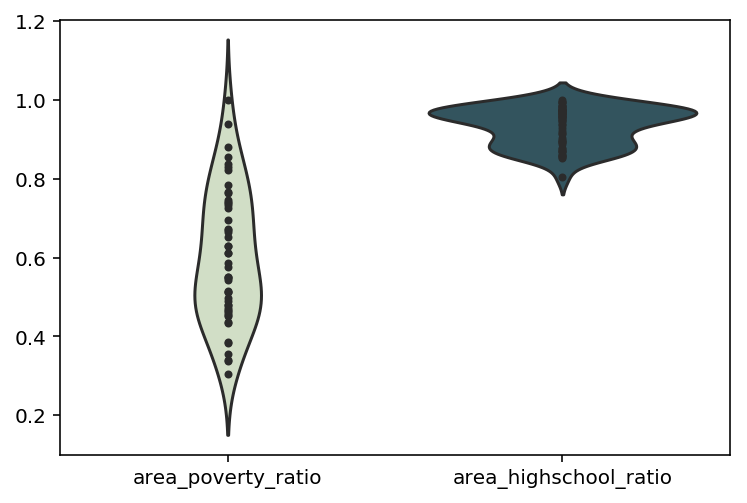

In [34]:
# Show each distribution with both violins and points
# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()

In [35]:
data.corr()

,area_poverty_ratio,area_highschool_ratio
area_poverty_ratio,1.000000,-0.805761
area_highschool_ratio,-0.805761,1.000000


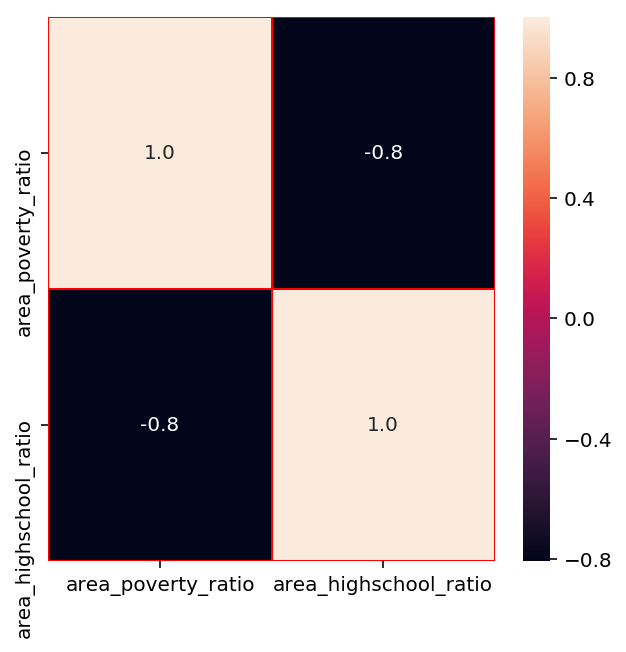

In [36]:
#correlation map
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

In [37]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [38]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

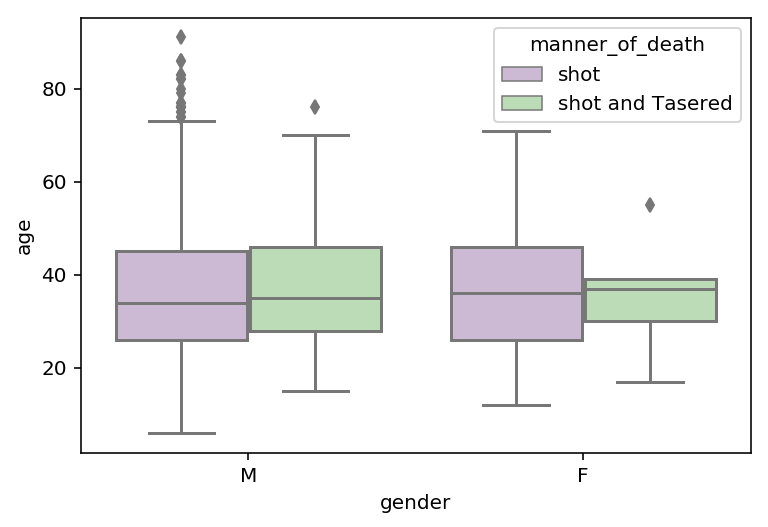

In [39]:
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas
# Plot the orbital period with horizontal boxes
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=kill, palette="PRGn")
plt.show()

In [40]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


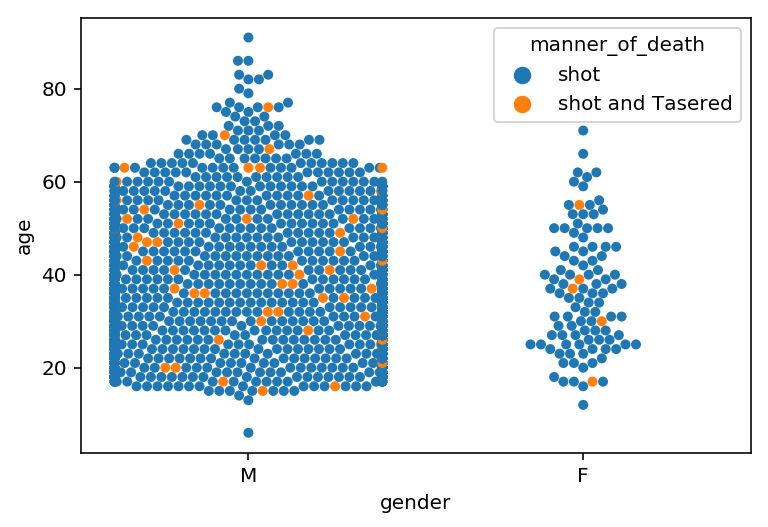

In [41]:
# swarm plot
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas
sns.swarmplot(x="gender", y="age",hue="manner_of_death", data=kill)
plt.show()

In [42]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


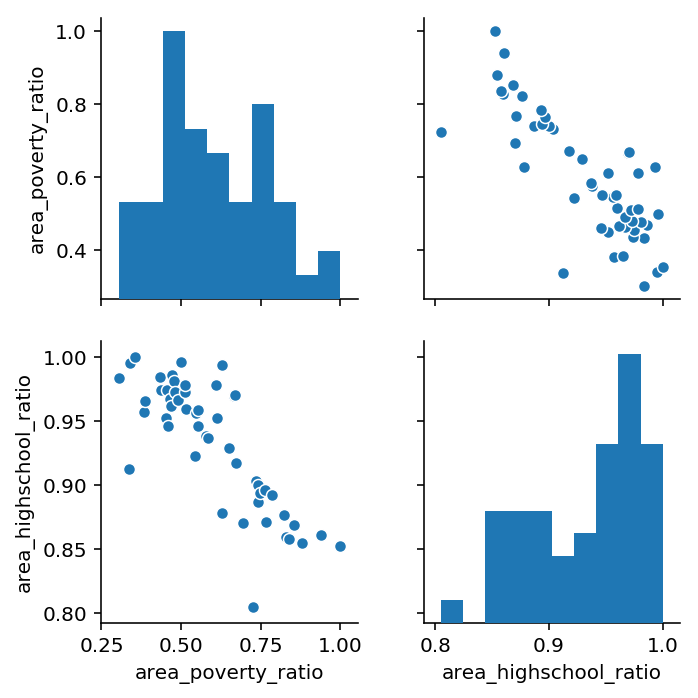

In [43]:
# pair plot
sns.pairplot(data)
plt.show()

In [44]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

In [45]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Text(0.5,1,'gender')

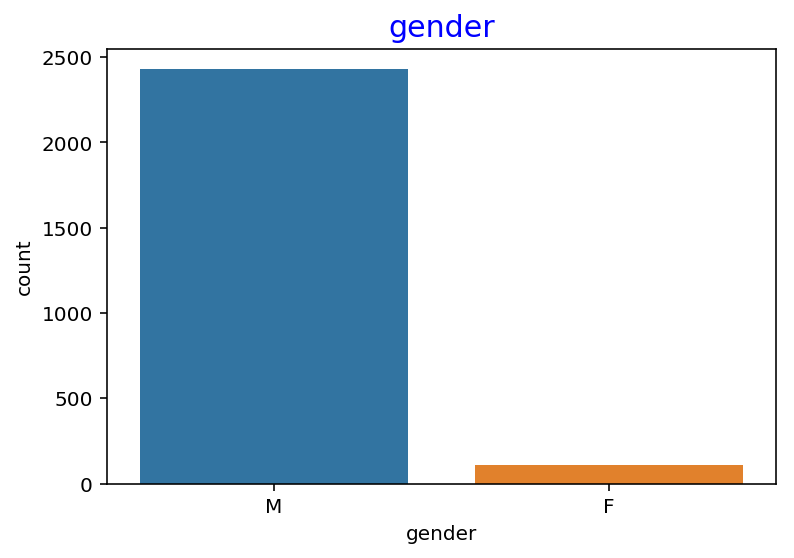

In [46]:
# kill properties
# Manner of death
sns.countplot(kill.gender)
#sns.countplot(kill.manner_of_death)
plt.title("gender",color = 'blue',fontsize=15)

Text(0.5,1,'Kill weapon')

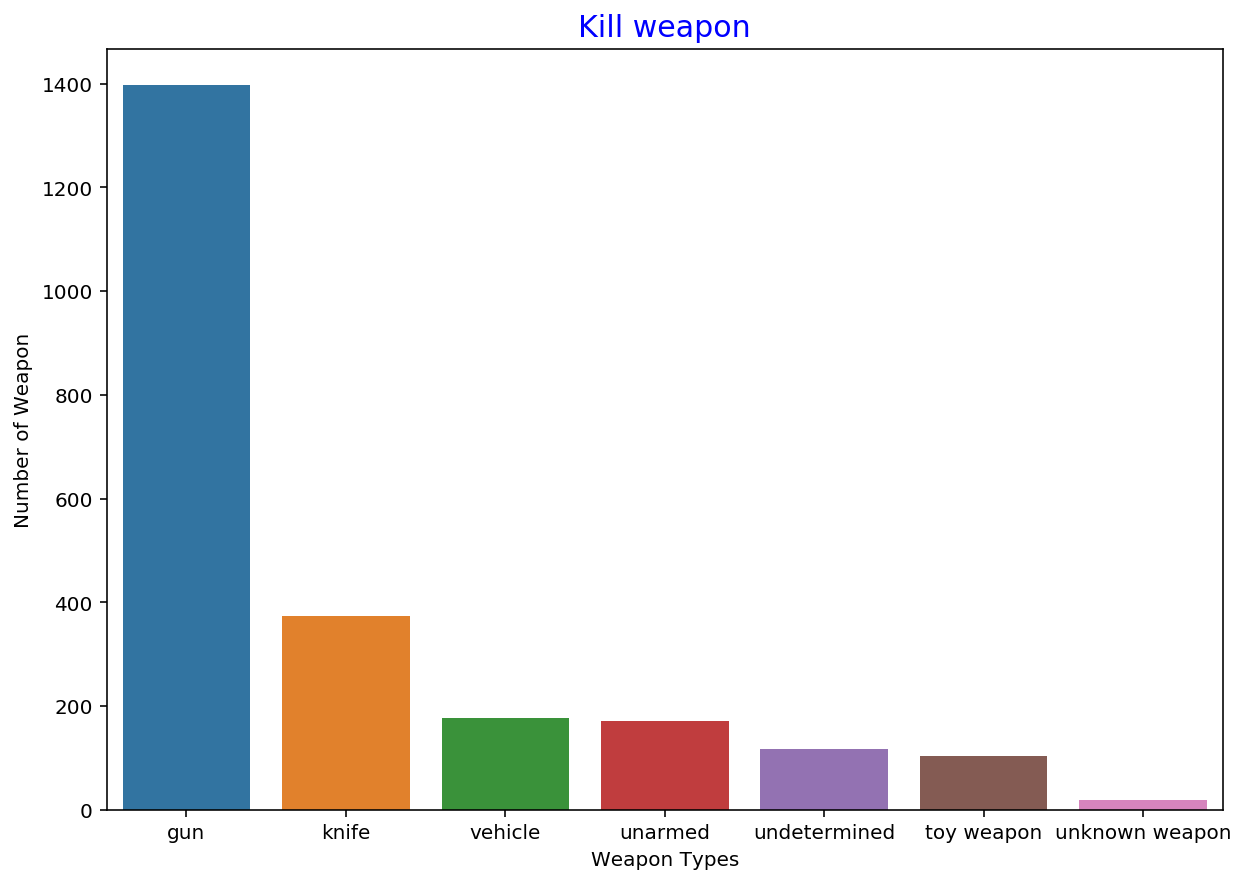

In [47]:
# kill weapon
armed = kill.armed.value_counts()
#print(armed)
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color = 'blue',fontsize=15)

Text(0.5,1,'Age of killed people')

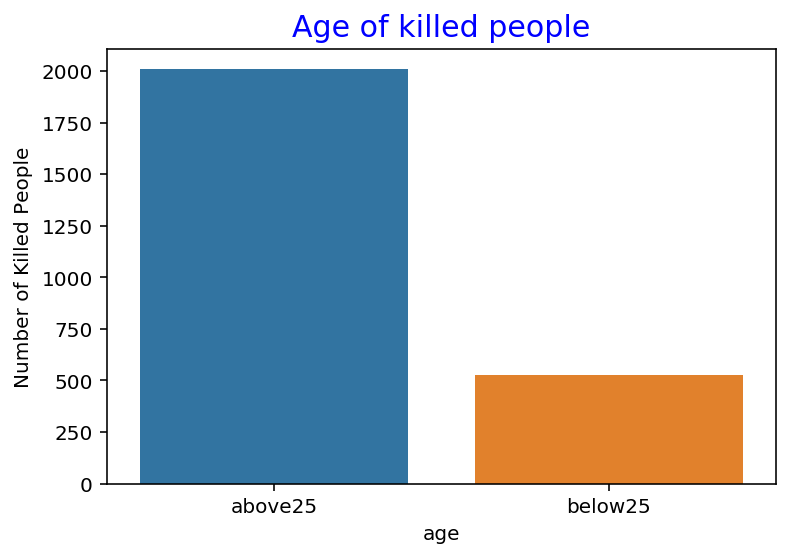

In [48]:
# age of killed people
above25 =['above25' if i >= 25 else 'below25' for i in kill.age]
df = pd.DataFrame({'age':above25})
sns.countplot(x=df.age)
plt.ylabel('Number of Killed People')
plt.title('Age of killed people',color = 'blue',fontsize=15)

Text(0.5,1,'Race of killed people')

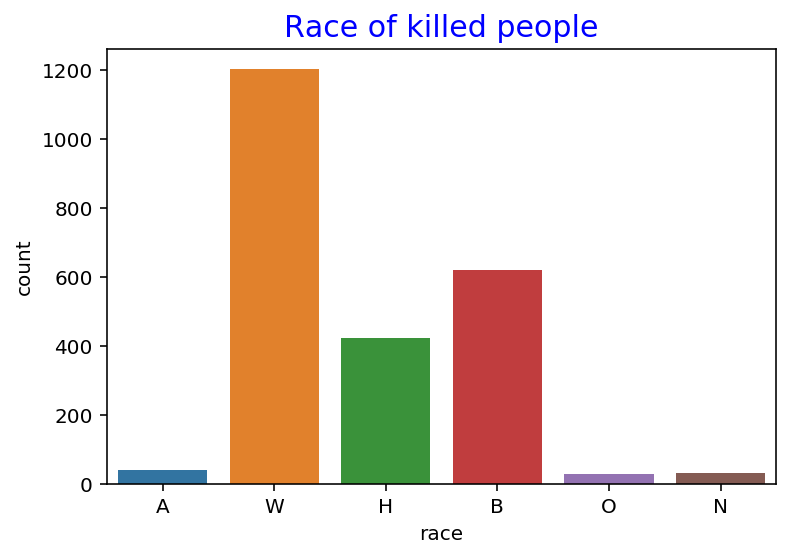

In [49]:
# Race of killed people
sns.countplot(data=kill, x='race')
plt.title('Race of killed people',color = 'blue',fontsize=15)

Text(0.5,1,'Most dangerous cities')

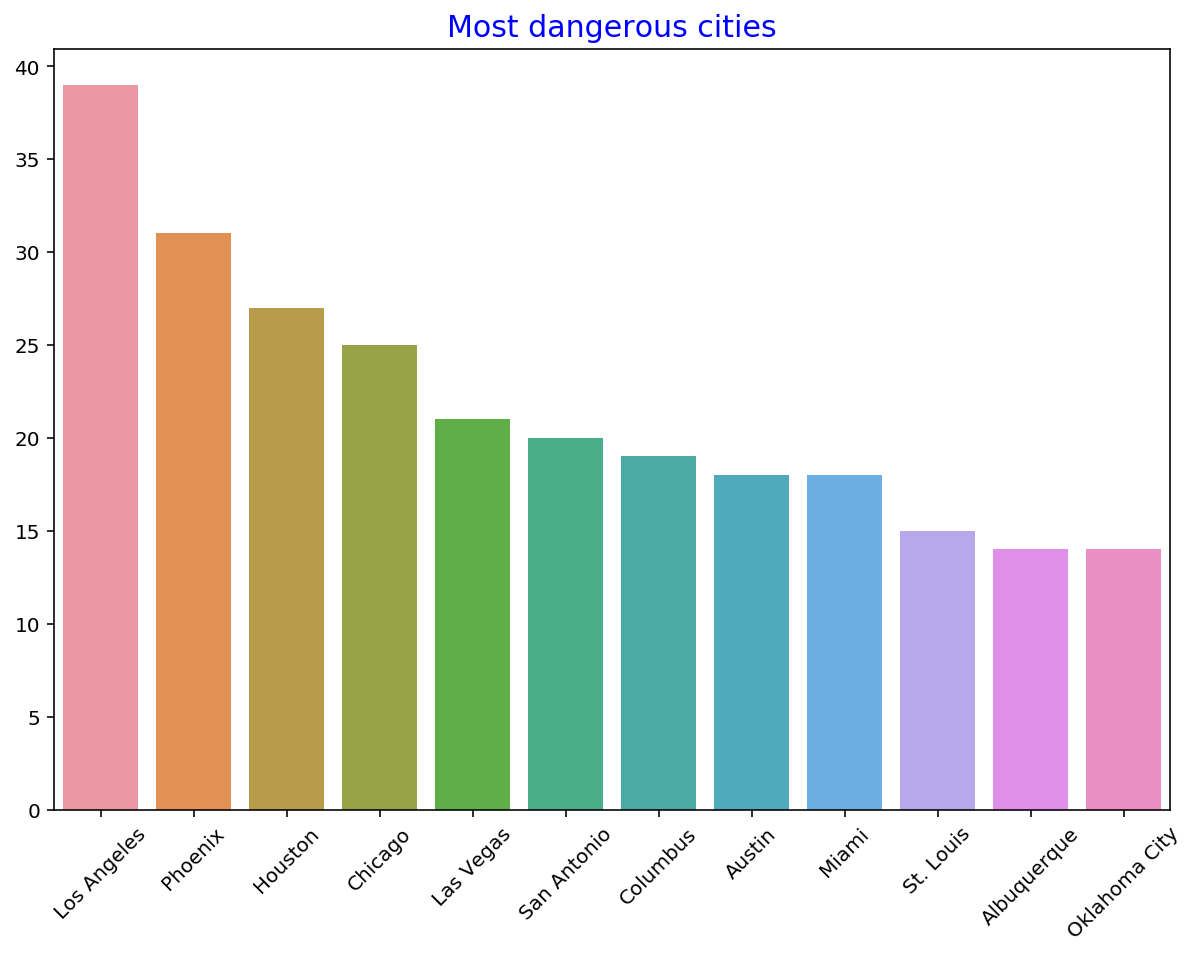

In [50]:
# Most dangerous cities
city = kill.city.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=city[:12].index,y=city[:12].values)
plt.xticks(rotation=45)
plt.title('Most dangerous cities',color = 'blue',fontsize=15)

Text(0.5,1,'Most dangerous state')

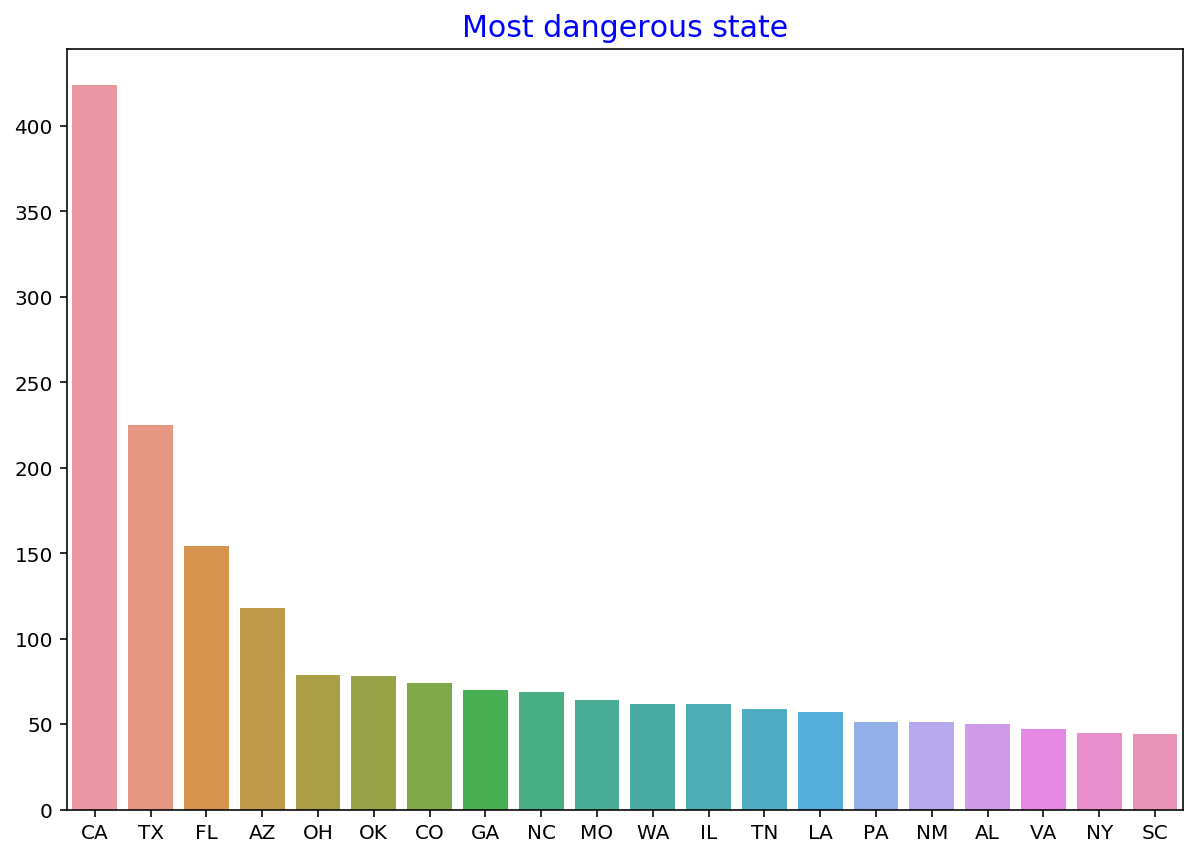

In [51]:
# most dangerous states
state = kill.state.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=state[:20].index,y=state[:20].values)
plt.title('Most dangerous state',color = 'blue',fontsize=15)

Text(0.5,1,'Having mental illness or not')

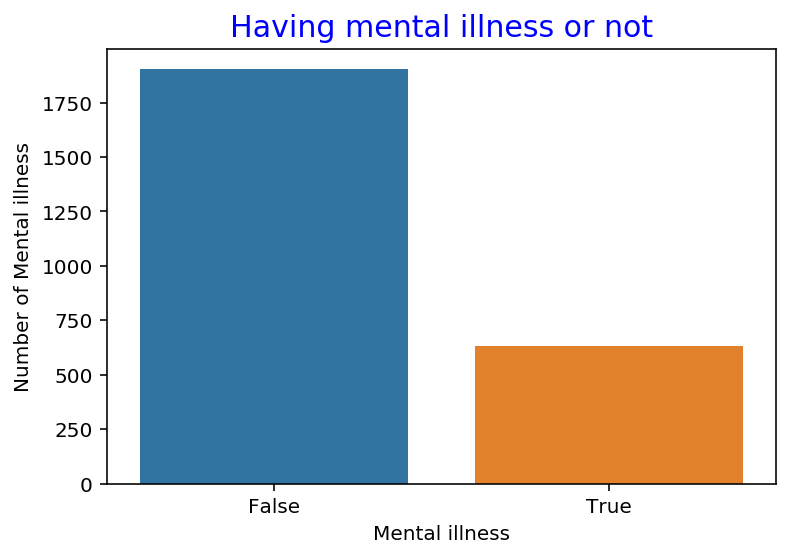

In [52]:
# Having mental ilness or not for killed people
sns.countplot(kill.signs_of_mental_illness)
plt.xlabel('Mental illness')
plt.ylabel('Number of Mental illness')
plt.title('Having mental illness or not',color = 'blue', fontsize = 15)

Text(0.5,1,'Threat types')

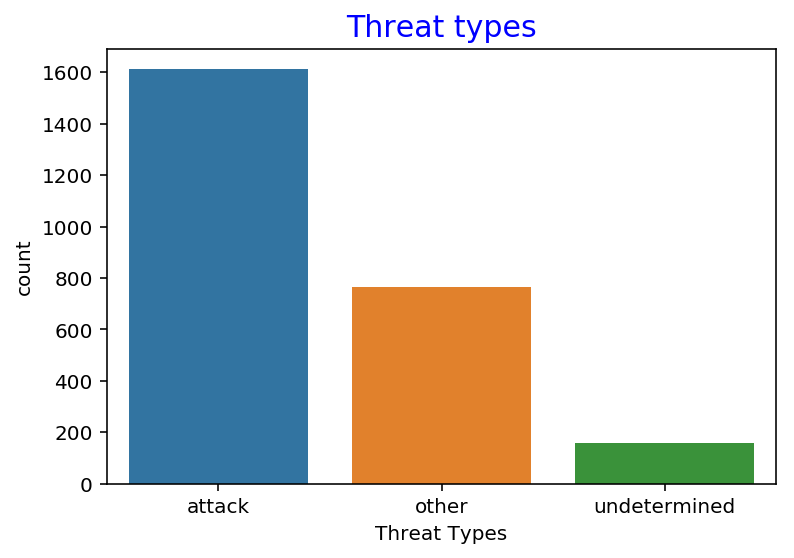

In [53]:
# Threat types
sns.countplot(kill.threat_level)
plt.xlabel('Threat Types')
plt.title('Threat types',color = 'blue', fontsize = 15)

Text(0.5,1,'Flee types')

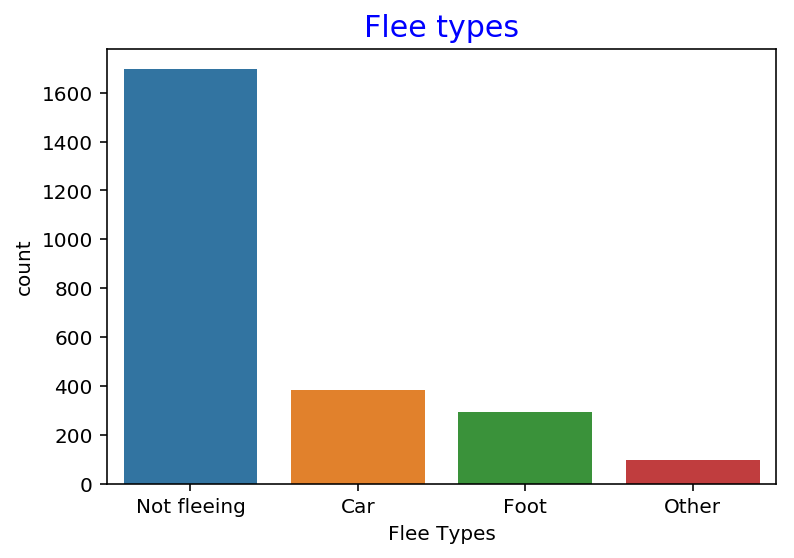

In [54]:
# Flee types
sns.countplot(kill.flee)
plt.xlabel('Flee Types')
plt.title('Flee types',color = 'blue', fontsize = 15)

Text(0.5,1,'Having body cameras or not on Police')

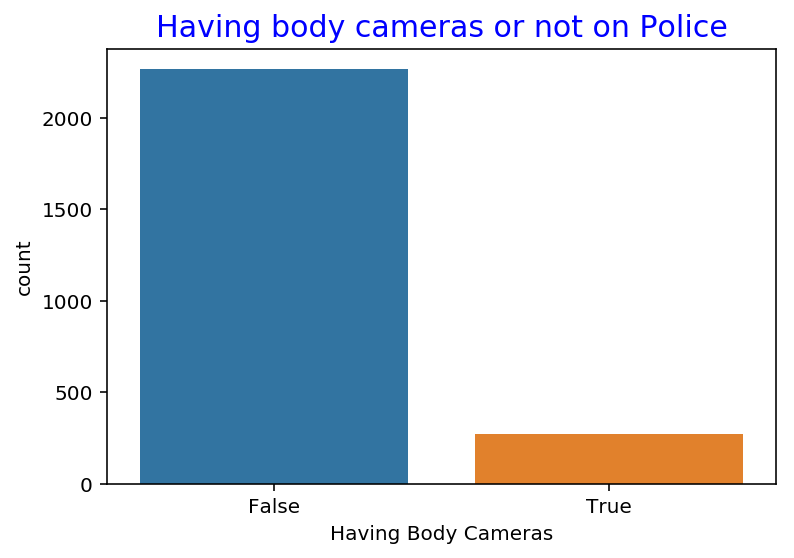

In [55]:
# Having body cameras or not for police
sns.countplot(kill.body_camera)
plt.xlabel('Having Body Cameras')
plt.title('Having body cameras or not on Police',color = 'blue',fontsize = 15)

Text(0.5,1,'Kill Numbers from States')

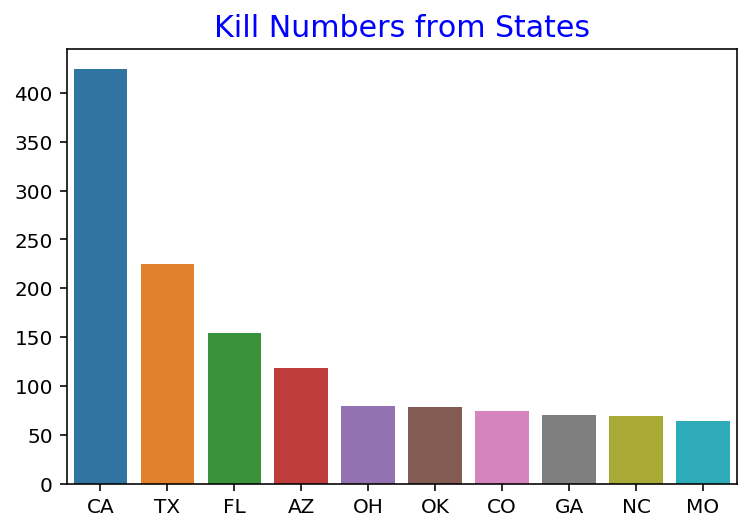

In [56]:
# Kill numbers from states in kill data
sta = kill.state.value_counts().index[:10]
sns.barplot(x=sta,y = kill.state.value_counts().values[:10])
plt.title('Kill Numbers from States',color = 'blue',fontsize=15)